In [17]:
!pip install -e "stable-baselines3-master\stable-baselines3-master"

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Obtaining file:///C:/Users/fabia/Documents/Uni/Part%20C/CS%20Project/Code/proj_code/stable-baselines3-master/stable-baselines3-master
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Building editable for stable_baselines3 (pyproject.toml): started
  Building editable for stable_baselines3 (pyproject.toml): finished with status 'done'
  Created wheel for stable_baselines3: filename=stable_baselines3-2.6.0-0.editable-py3-none-any.whl size=6340 sha256=91ccdd1c41a3f1a6f042b117

## Performing (non-robust) meta learning with the Khazad-Dum enviornment

In [19]:
#Perform imports
import random

import numpy as np
import torch
from torch import optim
from tqdm import tqdm

import gymnasium as gym


from stable_baselines3 import A2C

from stable_baselines3.common.logger import configure


import matplotlib.pyplot as plt


device = 'cpu'# 'cuda' #  #doing cpu as A2C with MlpPolicy (rather than CNNpolicy) in stablebaseline is faster on CPU, and the meta gradinet beign faster on GPU (even if it is) is not *that* much faster - it is about two(ish) times slower overall based on one run each with two meta iterations, so better on cpu in this case
torch.set_default_device(device)

In [20]:
model_save_path = "saved_models\\metalearningKD_13_expbonus1_bridgebonusfactor2"


In [24]:
##Set up for meta learning

#Hyperparameters
adapt_lr =  7e-4
meta_lr = 0.0005 
meta_iterations = 500#1250
adapt_timesteps = 32*4 #for this enviornment, each episode is exactly 32 timesteps, so multiple of 32 means full number of eps experienced for each task
tasks_per_loop = 40#60
adapt_visualisations = 15

vis_timesteps = meta_iterations//adapt_visualisations #denominator is number of visualisations we want
if vis_timesteps == 0:
    vis_timesteps = 1 

#Make meta-environment
import fabian.envs.khazad_dum_gymn 
env = gym.make("KhazadDum-v1") # can access wrapped env with "env.unwrapped" (e.g. to reset task)
env.unwrapped.exp_bonus = 1; env.unwrapped.bridge_bonus_factor = 2 #this should incentivise getting to the target asap, and incentivise going onto the bridge

#Make meta-policy and meta-optimiser
meta_agent = A2C("MlpPolicy", env, verbose=0, meta_learning=True, learning_rate=adapt_lr, device=device) #we train the meta_agent to do well at adapting to new envs (i.e. meta learning) in our env distribution
meta_opt = optim.Adam(meta_agent.policy.parameters(), lr=meta_lr)

#Logging variables
meta_losses = []
meta_rets = []
best_meta_ret = None
best_meta_ret_it = -1

c:\Users\fabia\anaconda3\envs\projdist\Lib\site-packages\gymnasium\envs\registration.py:487: UserWarning: WARN: The environment creator metadata doesn't include `render_modes`, contains: ['render.modes']
  logger.warn(


  0%|          | 0/500 [00:00<?, ?it/s]C:\Users\fabia\AppData\Local\Temp\ipykernel_5084\1731386578.py:47: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
  0%|          | 1/500 [02:31<21:01:20, 151.66s/it]

Meta loop 1/500 complete, validation loss: -0.08475130051374435, validation return: -0.1322692632675171


  7%|▋         | 34/500 [5:22:37<84:32:34, 653.12s/it]

Meta loop 34/500 complete, validation loss: -0.09466702491044998, validation return: -0.8494154214859009


 13%|█▎        | 67/500 [10:50:10<58:16:57, 484.57s/it]

Meta loop 67/500 complete, validation loss: -0.04761134833097458, validation return: -1.6196129322052002


 20%|██        | 100/500 [16:07:57<86:50:46, 781.62s/it]

Meta loop 100/500 complete, validation loss: -0.026669587939977646, validation return: -2.351254940032959


 27%|██▋       | 133/500 [23:31:06<83:23:49, 818.06s/it]

Meta loop 133/500 complete, validation loss: -0.011740876361727715, validation return: -2.6531589031219482


 33%|███▎      | 166/500 [25:59:38<17:43:56, 191.13s/it]

Meta loop 166/500 complete, validation loss: -0.011995021253824234, validation return: -2.6121652126312256


 40%|███▉      | 199/500 [27:46:25<16:15:57, 194.54s/it]

Meta loop 199/500 complete, validation loss: -0.007552343420684338, validation return: -2.5904760360717773


 46%|████▋     | 232/500 [29:31:45<14:17:02, 191.87s/it]

Meta loop 232/500 complete, validation loss: -0.0004452384018804878, validation return: -2.547677993774414


 53%|█████▎    | 265/500 [31:24:22<14:38:35, 224.32s/it]

Meta loop 265/500 complete, validation loss: 0.06021808832883835, validation return: -2.119544267654419


 60%|█████▉    | 298/500 [33:27:20<12:24:34, 221.16s/it]

Meta loop 298/500 complete, validation loss: 0.08117584884166718, validation return: -1.5002957582473755


 66%|██████▌   | 331/500 [35:28:55<10:28:02, 222.97s/it]

Meta loop 331/500 complete, validation loss: 0.0635605901479721, validation return: -0.881545901298523


 73%|███████▎  | 364/500 [36:56:06<6:04:52, 160.98s/it] 

Meta loop 364/500 complete, validation loss: 0.04995318874716759, validation return: -0.9866264462471008


 79%|███████▉  | 397/500 [38:23:09<4:27:24, 155.77s/it]

Meta loop 397/500 complete, validation loss: 0.055233411490917206, validation return: -0.9409974217414856


 86%|████████▌ | 430/500 [39:43:00<2:42:13, 139.04s/it]

Meta loop 430/500 complete, validation loss: 0.04982640594244003, validation return: -0.9853367805480957


 93%|█████████▎| 463/500 [40:59:41<1:26:13, 139.83s/it]

Meta loop 463/500 complete, validation loss: 0.05066242069005966, validation return: -1.006685495376587


 99%|█████████▉| 496/500 [42:16:32<09:20, 140.10s/it]  

Meta loop 496/500 complete, validation loss: 0.05662652850151062, validation return: -0.8982931971549988


100%|██████████| 500/500 [42:26:09<00:00, 305.54s/it]


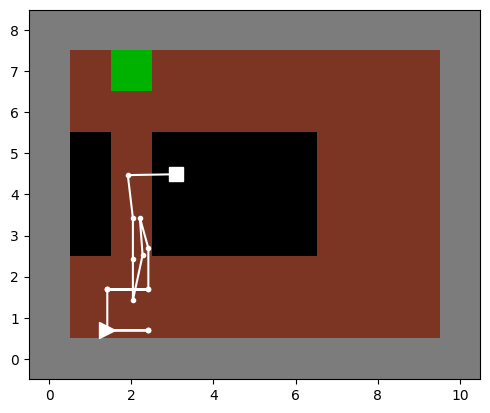

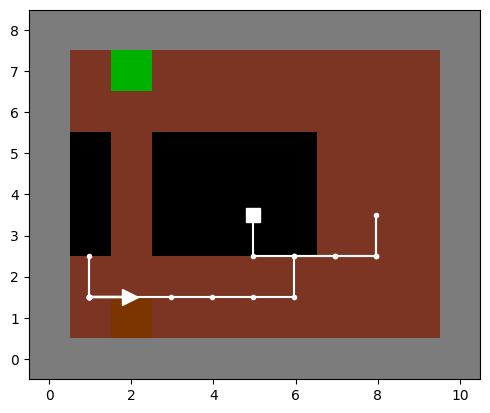

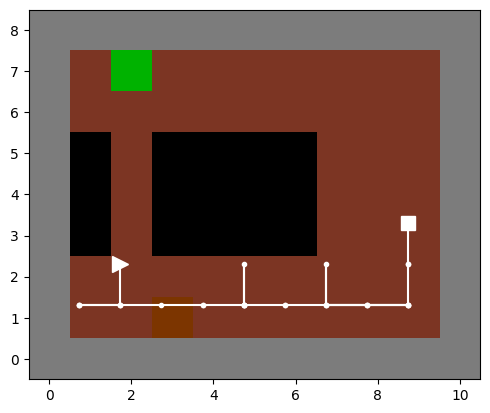

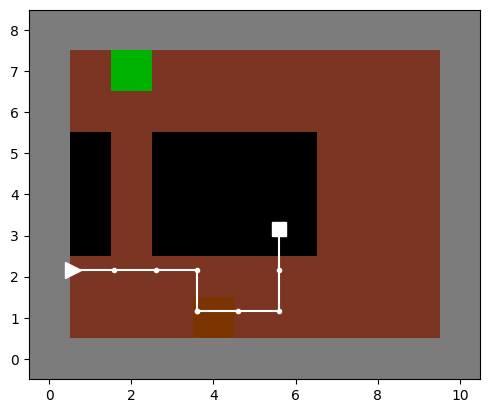

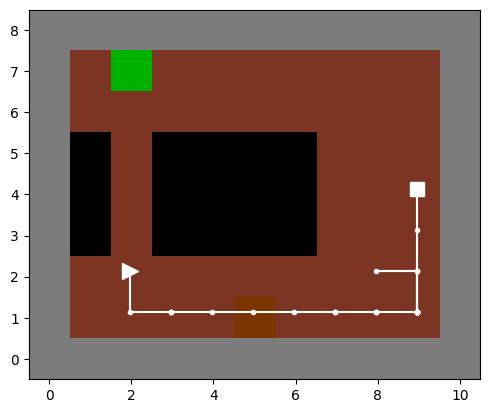

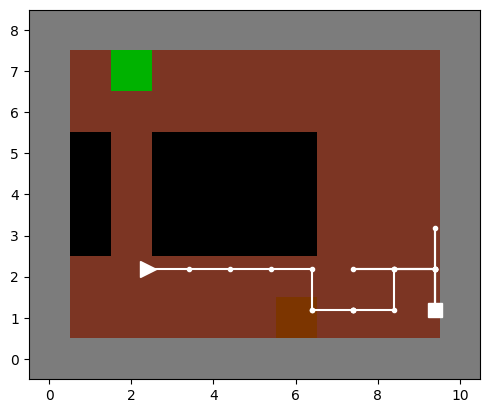

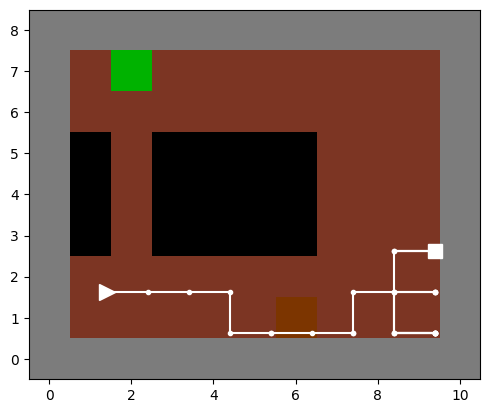

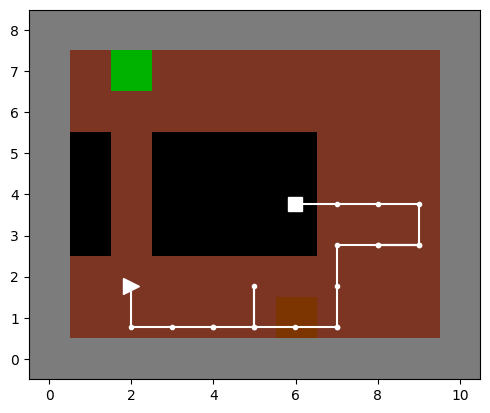

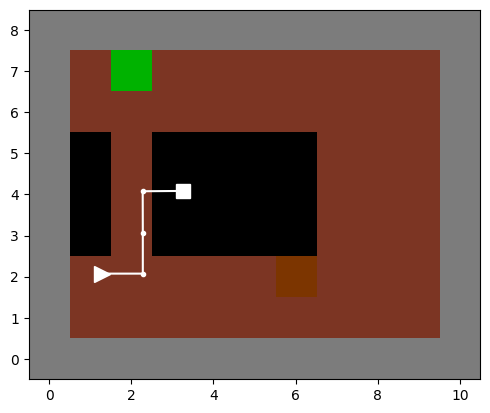

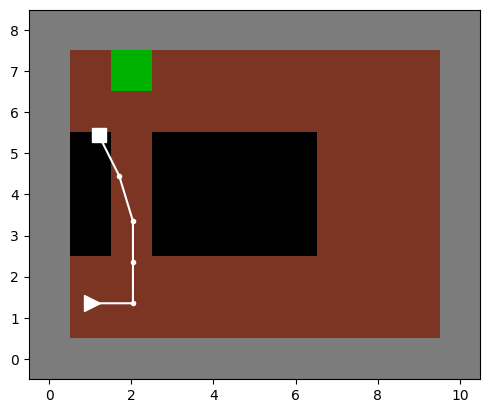

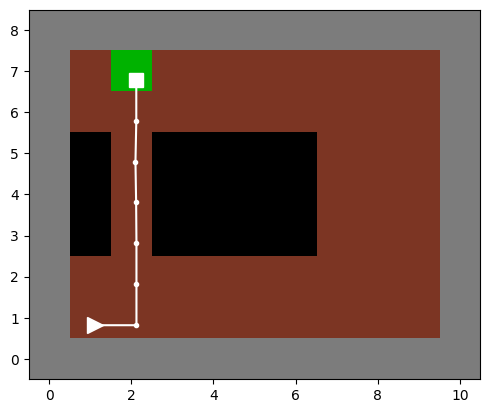

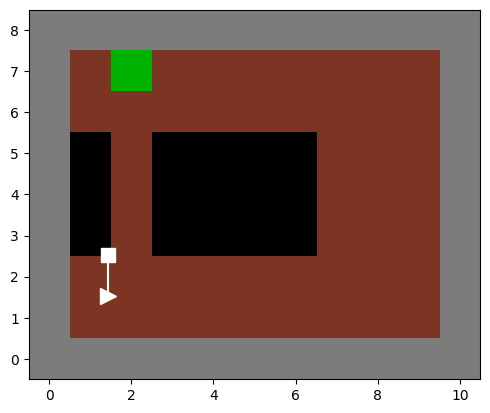

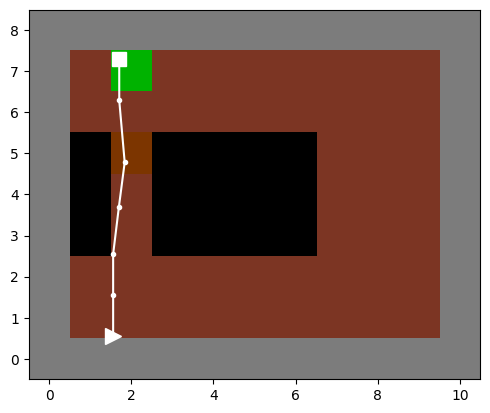

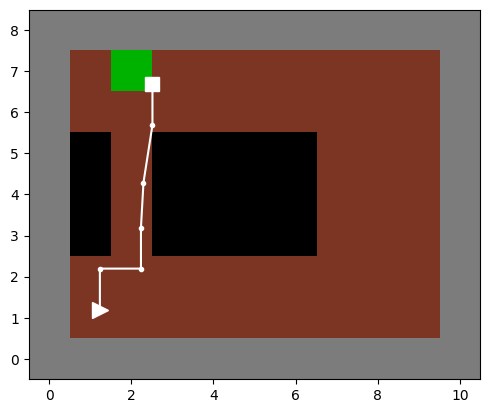

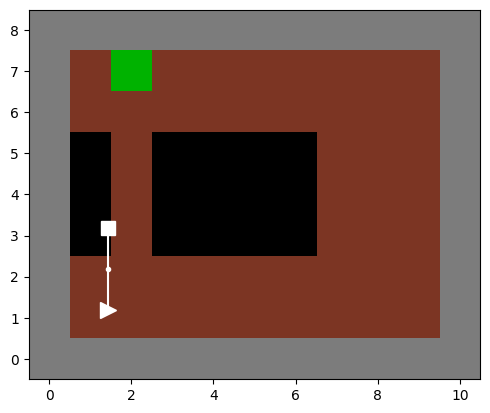

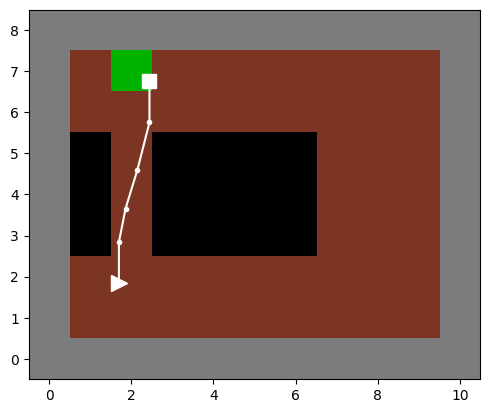

In [5]:
#Outer meta-learning loop
for meta_it in tqdm(range(meta_iterations)):
    meta_loss = 0
    meta_ret = 0
    #Have agent adapt to tasks one by one
    for t in (range(tasks_per_loop)):
        env.unwrapped.reset_task() #randomly selects task from environment to reset it to
        
        meta_agent.learn(total_timesteps=adapt_timesteps) #adapt the meta agent to this task

        adaptation_loss, a_rets = meta_agent.run_meta_adaption_and_loss(total_timesteps=100) #sample {total_timesteps} worth of timesteps from task and get loss of adapted agent
                #TODO: this is just for debugging - change stuff so it is just returning loss again soon! andget sepereate func for rets if needed

        meta_loss += adaptation_loss
        meta_ret += a_rets

    #Perform gradient update on meta learning parameters
    meta_loss/=tasks_per_loop #normalise, so that learning rate need not depend on tasks/loop
    meta_ret/=tasks_per_loop
    
    meta_opt.zero_grad()
    meta_loss.backward()
    meta_opt.step()

    #Save(/override) the best performing model (w.r.t performance against adaptation task set)
    if best_meta_ret is None or meta_ret>best_meta_ret :
        best_meta_ret = meta_ret
        best_meta_ret_it = meta_it
        torch.save(meta_agent.policy.state_dict(), f"{model_save_path}\\best_val_meta_ret") #OK to just save {model.policy} as that is all being meta-optimised
            #TODO: could it be that the highest return happens before the end of training because actually it then optimises loss and that gets us to the target in a way that return doesnt capture? not sure that makes sense so probs not....??? unlike loss being wierd before the critic is trained (I think thta is the source of the wierdness) return should always tell us whats good and what isnt rihgt?

    #Track meta_training curve
    meta_losses.append(meta_loss.detach().item())
    meta_rets.append(meta_ret.item())

  #  #Pause training every 30 meta iterations and wait for input (just for now, so I can safely pause stuff!)
   # if meta_it % 30 == 0:
    #    input(f"Paused at iteration {meta_it}; Press enter to coninue.")

    if meta_it % vis_timesteps == 0:
        #Output training info to console
        print(f"Meta loop {meta_it+1}/{meta_iterations} complete, validation loss: {meta_loss.detach().item()}, validation return: {meta_ret}")

        #Qualitative plot of adapted policy
        fig, ax = plt.subplots()
        ax = env.unwrapped.show_state(ax)    
        fig.show()

        #Save meta model
        torch.save(meta_agent.policy.state_dict(), f"{model_save_path}\\meta_it_{meta_it}")


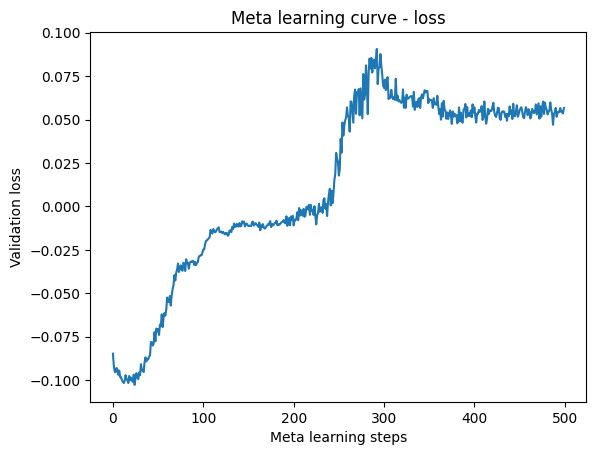

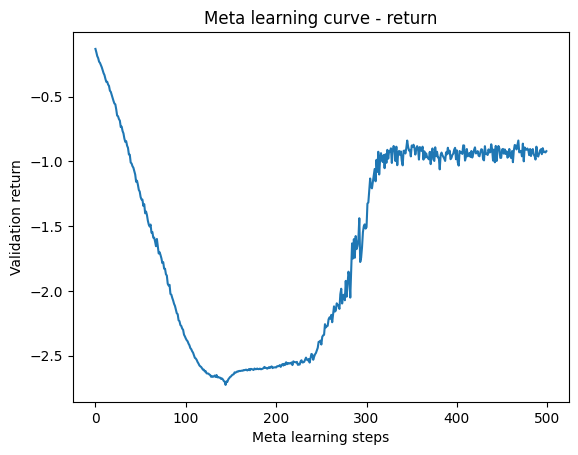

In [7]:
##Plot meta learning curves
xs = range(len(meta_losses))

plt.plot(xs, meta_losses)
plt.xlabel('Meta learning steps')
plt.ylabel('Validation loss')
plt.title('Meta learning curve - loss')
plt.show()

plt.plot(xs, meta_rets)
plt.xlabel('Meta learning steps')
plt.ylabel('Validation return')
plt.title('Meta learning curve - return')
plt.show()

In [25]:
#Load in enviornemnt that performed best against meta validation
loaded_meta_agent = A2C("MlpPolicy", env, verbose=0, meta_learning=True, learning_rate=adapt_lr, device=device)
#loaded_meta_agent.policy.load_state_dict(torch.load(f"{model_save_path}\\best_val_meta_ret", weights_only=True)) 
    #as can be seen in the learning curve above, the model with the best meta-return is very much not the one which actually performs the best (if we see it perform, we see it just geniunely does badly!)
    #TODO: what is going on with that?

#loaded_meta_agent.policy.load_state_dict(torch.load(f"{model_save_path}\\meta_it_{495}", weights_only=True)) 

loaded_meta_agent.policy.load_state_dict(torch.load(f"{model_save_path}\\final_model", weights_only=True)) 


    #can also load in intermediate saved envs from training

<All keys matched successfully>

100%|██████████| 9/9 [00:41<00:00,  4.56s/it]
C:\Users\fabia\AppData\Local\Temp\ipykernel_26592\785627211.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


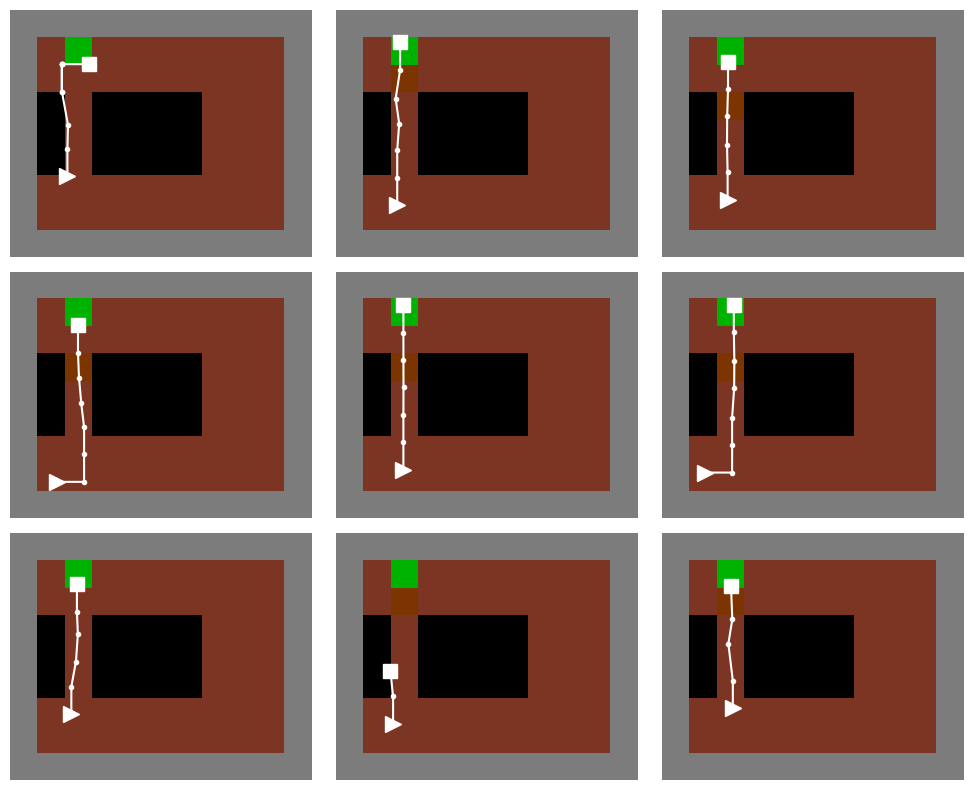

In [ ]:
#Seeing it manage in a range of environments - this one is taken from loading the best model from a 400 meta-step training, which clearly isnt quite all that 
dim = 3
fig, axs = plt.subplots(dim, dim, figsize=(10, 8))

for t in tqdm(range(dim*dim)):
    #Perform few shot adaption to environment
    env.unwrapped.reset_task() #randomly selects task from environment to reset it to
    loaded_meta_agent.learn(total_timesteps=adapt_timesteps) #adapt the meta agent to this task

    #Test against a new trajectory from that state (else we are showing something it trained to and before the final training step)
    loaded_meta_agent.run_meta_adaption_and_loss(total_timesteps=32)

    #TODO: IMPROTANT TO NOTE - for fair evaluation of a MAML-meta-policy, as this is all about few-shot learning, we need to evaluate its performance to a task after having had a chance to adapt to that task

    #Plot this run
    x = t//dim
    y = t%dim
    axs[x,y] = env.unwrapped.show_state(axs[x,y])    
    axs[x,y].set_axis_off()
    
plt.tight_layout()

fig.show()


#TODO: i should do this again with a non meta-trained model that just learns for a single task and see how it does worse qualitatively